In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\KIM EUNKI\\Dataset\\OnlineRetail.csv", sep = ',', encoding='CP949')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [20]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
#CustomerID 결측치 제거
df = df[pd.notnull(df['CustomerID'])]
len(df)

406829

In [44]:
#Quantity와 UnitPrice 컬럼의 음수 부분을 제거
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
len(df)

397884

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [47]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [52]:
#CustomerID를 정수형으로 변환(메모리 효율화)
import numpy as np
df['CustomerID'] = df['CustomerID'].astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [59]:
#새로운 변수 생성(CheckoutPtice = Quantity * UnitPrice)
df['CheckoutPrice'] = df['Quantity'] * df['UnitPrice']
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680,France,14.85


In [61]:
#InvoiceDate 컬럼을 날짜형으로 변환(분석에 용이)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [62]:
df.to_csv("C:\\Users\\KIM EUNKI\\Dataset\\OnlineRetailClean.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [70]:
df = pd.read_csv("C:\\Users\\KIM EUNKI\\Dataset\\OnlineRetailClean.csv")

In [71]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  int64  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [6]:
#InvoiceDate 컬럼을 날짜형으로 변환(분석에 용이)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int64         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float64       
 7   CustomerID     397884 non-null  int64         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.4+ MB


In [7]:
df.to_csv("C:\\Users\\KIM EUNKI\\Dataset\\OnlineRetail.csv")

***
## 매출 기준 데이터 확인

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\KIM EUNKI\\Dataset\\OnlineRetail.csv", index_col=0)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 30.4+ MB


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [7]:
# 전체 매출(Total_revenue)
total_revenue = df['CheckoutPrice'].sum()
total_revenue

8911407.904

In [8]:
# 국가별 매출(Country_revenue)
country_revenue = df.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending = False) # 내림차순 정렬
country_revenue.head(10)

Country
United Kingdom    7.308392e+06
Netherlands       2.854463e+05
EIRE              2.655459e+05
Germany           2.288671e+05
France            2.090240e+05
Australia         1.385213e+05
Spain             6.157711e+04
Switzerland       5.644395e+04
Belgium           4.119634e+04
Sweden            3.837833e+04
Name: CheckoutPrice, dtype: float64

[Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Saudi Arabia')]

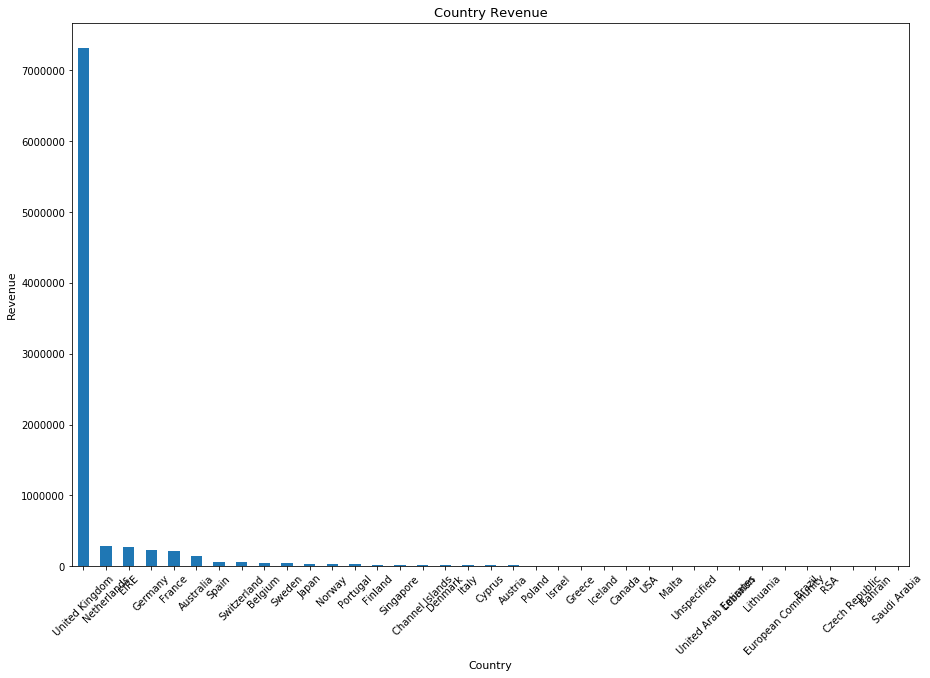

In [9]:
plot = country_revenue.plot(kind = 'bar', color = COLORS[0], figsize = (15, 10))
plot.set_xlabel('Country', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Country Revenue', fontsize = 13)
plot.set_xticklabels(labels = country_revenue.index, rotation = 45)

In [10]:
# 국가별 매출 비율
(country_revenue / total_revenue * 100).head()

Country
United Kingdom    82.011638
Netherlands        3.203156
EIRE               2.979842
Germany            2.568249
France             2.345578
Name: CheckoutPrice, dtype: float64

In [11]:
# 월별 매출
# 월별 표시 함수 생성
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + '-' + month

In [12]:
df['InvoiceDate'].sort_values( ascending = False)

397883   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [13]:
month_revenue = df.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
month_revenue
# 2011년 12월의 경우 9일까지만 집계되어 있음

2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Name: CheckoutPrice, dtype: float64

[Text(0, 0, '2010-12'),
 Text(0, 0, '2011-01'),
 Text(0, 0, '2011-02'),
 Text(0, 0, '2011-03'),
 Text(0, 0, '2011-04'),
 Text(0, 0, '2011-05'),
 Text(0, 0, '2011-06'),
 Text(0, 0, '2011-07'),
 Text(0, 0, '2011-08'),
 Text(0, 0, '2011-09'),
 Text(0, 0, '2011-10'),
 Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12')]

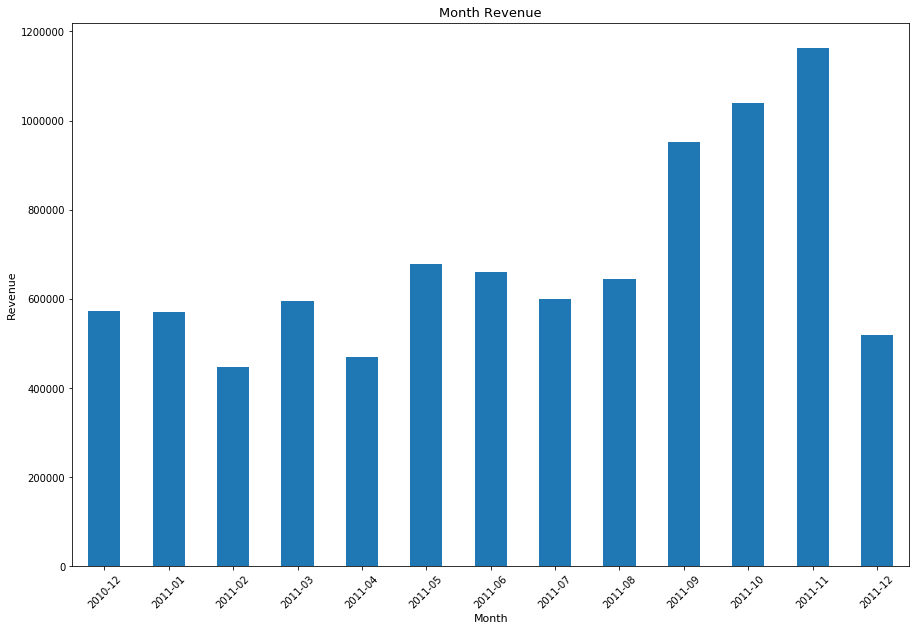

In [14]:
plot = month_revenue.plot(kind = 'bar', color = COLORS[0], figsize = (15, 10))
plot.set_xlabel('Month', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Month Revenue', fontsize = 13)
plot.set_xticklabels(labels = month_revenue.index, rotation = 45)

In [15]:
# 요일별 매출
dow_revenue = df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
dow_revenue
# 0: 월요일 .. 6: 일요일
# 토요일(5) 자료가 비어있음을 알 수 있음.

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [16]:
# 요일을 영어로 변경
import numpy as np
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wen', 'Thr', 'Fri', 'Sat', 'Sun'])
dow_revenue.index = DAY_OF_WEEK[dow_revenue.index]

In [17]:
dow_revenue

Mon    1367146.411
Tue    1700634.631
Wen    1588336.170
Thr    1976859.070
Fri    1485917.401
Sun     792514.221
Name: CheckoutPrice, dtype: float64

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wen'),
 Text(0, 0, 'Thr'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sun')]

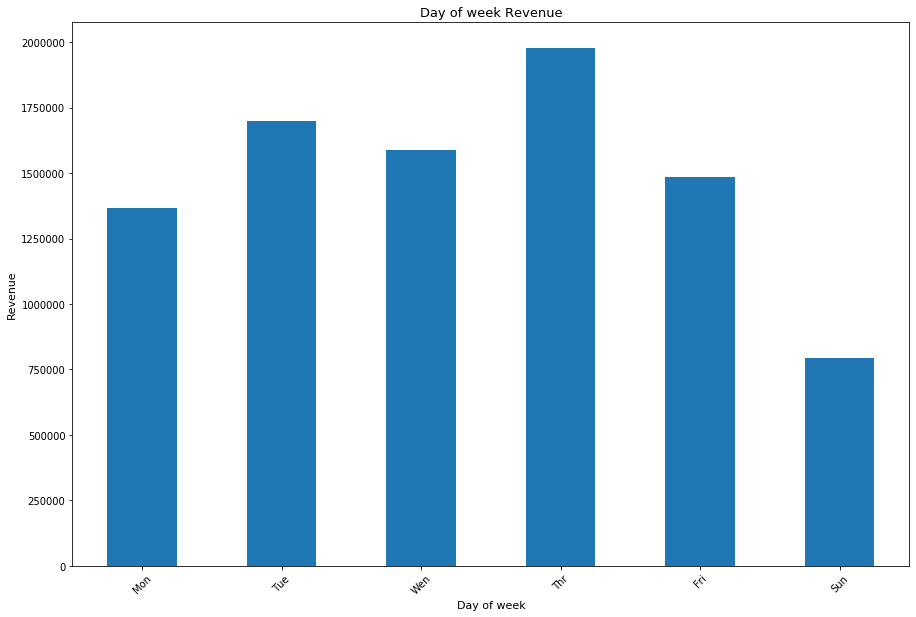

In [18]:
plot = dow_revenue.plot(kind = 'bar', color = COLORS[0], figsize = (15, 10))
plot.set_xlabel('Day of week', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Day of week Revenue', fontsize = 13)
plot.set_xticklabels(labels = dow_revenue.index, rotation = 45)

In [19]:
# 시간별 매출
hour_revenue = df.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
hour_revenue

6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

[Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20')]

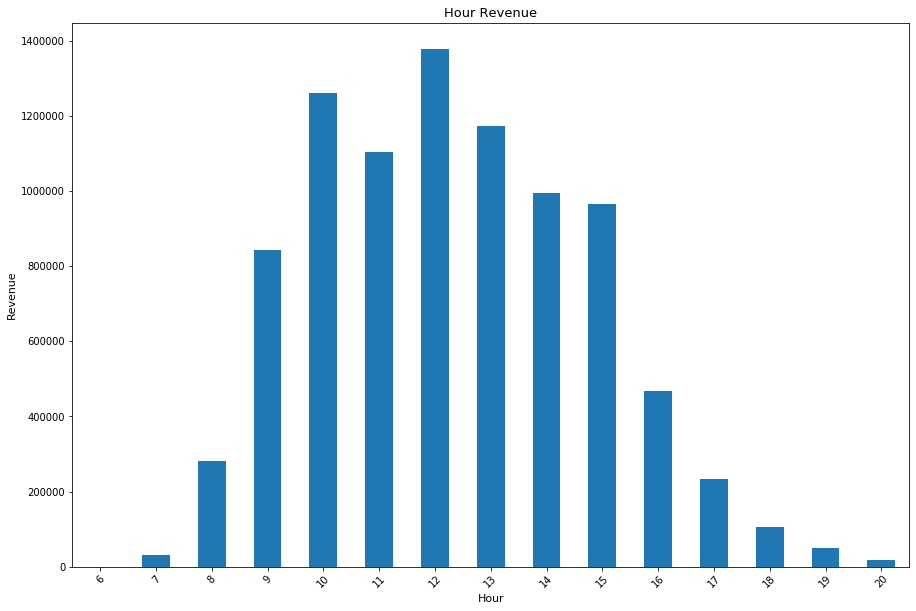

In [20]:
plot = hour_revenue.plot(kind = 'bar', color = COLORS[0], figsize = (15, 10))
plot.set_xlabel('Hour', fontsize = 11)
plot.set_ylabel('Revenue', fontsize = 11)
plot.set_title('Hour Revenue', fontsize = 13)
plot.set_xticklabels(labels = hour_revenue.index, rotation = 45)

매출 데이터로부터 알 수 있는 점
- 전체 매출의 대부분(약 82%)가 영국에서 발생.
- 11년도의 가장 많은 매출은 11월에 발생(12월은 전체 데이터가 집계되지 않음): 블랙프라이데이 등 연말에 매출이 많음을 유추할 수 있음.
- 일주일 단위로는 목요일까지 상승하다가 이후 하락.(토요일은 주문 데이터가 없음)
- 시간단위로는 낮 12시까지 매출 급상승, 이후 하락세를 보이다가 오후 3시 이후로 급락함을 알 수 있음.

***
## 제품 기준 데이터 확인

In [31]:
# 가장 많이 팔린 아이템: '23843 제품'
top_selling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending = False)[:3]
top_selling.head()

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [26]:
# 가장 많은 매출을 올린 아이템: '23843 제품'
top_revenue = df.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending = False)[:3]
top_revenue.head()

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
Name: CheckoutPrice, dtype: float64

***
TOP3 아이템의 월별 판매량 추이

In [34]:
df.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]

Quantity  CheckoutPrice
StockCode                                 
23166     2011-01     74215       77183.60
          2011-05       792         869.04
          2011-06       391         458.51
          2011-07       718         826.94
          2011-08       405         486.09
          2011-09       342         397.26
          2011-10       235         283.67
          2011-11       631         708.11
          2011-12       187         203.51
23843     2011-12     80995      168469.60
84077     2010-12      5139        1150.47
          2011-01      1488         385.44
          2011-02      3457         795.17
          2011-03      3888         943.20
          2011-04     10224        2281.44
          2011-05      4944        1249.44
          2011-06      1920         533.76
          2011-07      3600         982.56
          2011-08      2256         654.24
          2011-09      3462         985.70
          2011-10      8174        1953.98
          2011-11      4500        1294.20
          2011-12      1363         376.65